# Clustering using Dendrograms and K-Means

In [16]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:\\Datas\\Universities.csv")
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
df.shape

(25, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [5]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
df_norm = norm_func(df.iloc[:,1:])
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


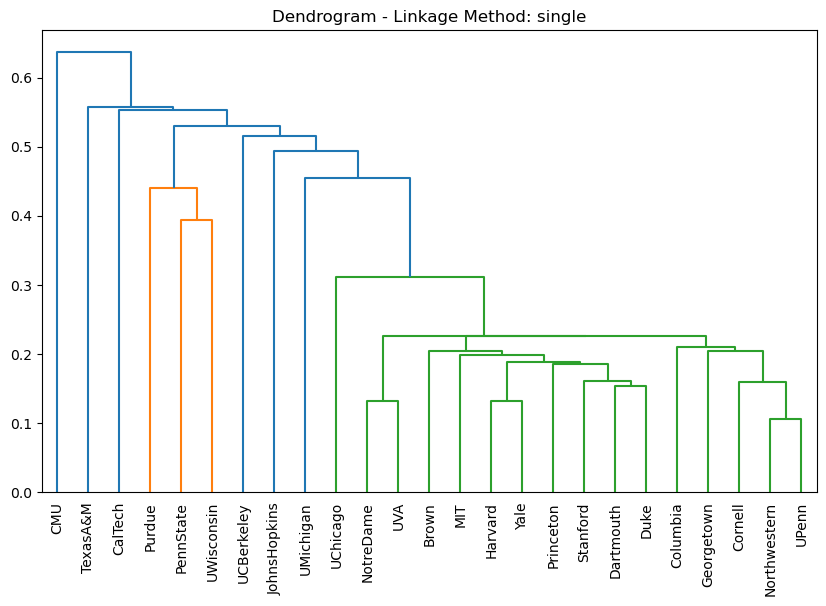

Method: single, Cophenetic Correlation Coefficient: 0.7299199190150972


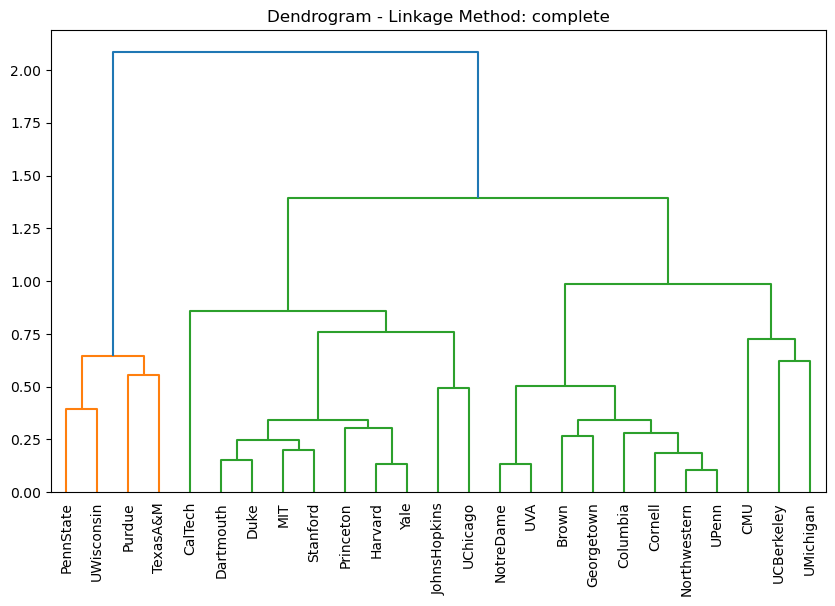

Method: complete, Cophenetic Correlation Coefficient: 0.7725830274018992


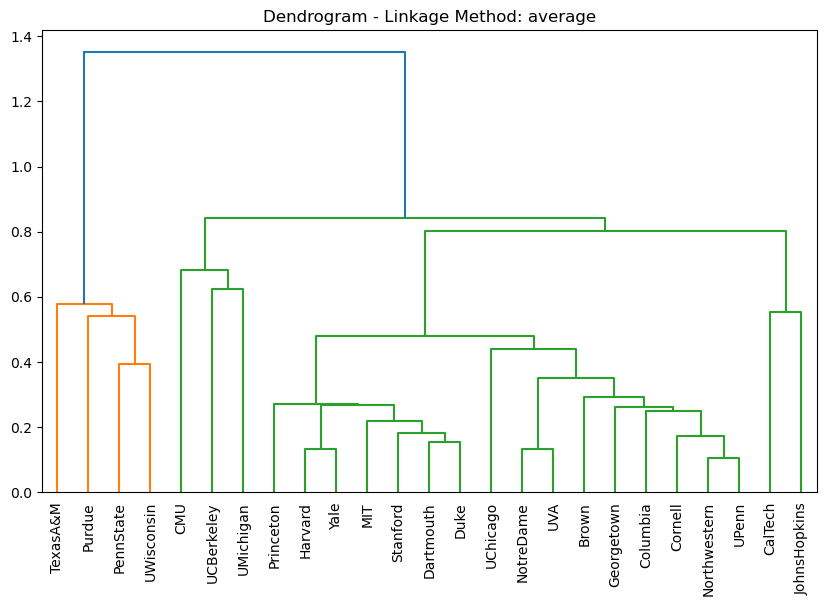

Method: average, Cophenetic Correlation Coefficient: 0.8765784871097125


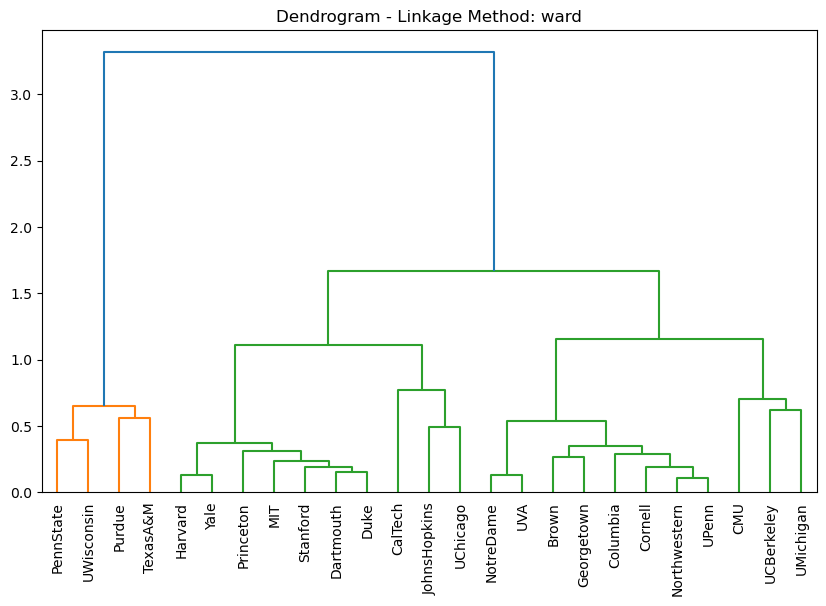

Method: ward, Cophenetic Correlation Coefficient: 0.8103063736289481


In [7]:
# Run hierarchical clustering with different linkages
linkage_methods = ['single', 'complete', 'average', 'ward']

for method in linkage_methods:
    # Create linkage matrix using the current method
    linkage_matrix = sch.linkage(df_norm, method=method)
    
    # Generate dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram = sch.dendrogram(linkage_matrix,labels=df['Univ'].values, leaf_rotation=90)
    
    plt.title(f'Dendrogram - Linkage Method: {method}')
    plt.show()
    
    coph_dists = pdist(df_norm)
    c,coph_dists = sch.cophenet(linkage_matrix, coph_dists)
    
    # Print method and cophenetic correlation coefficient
    print(f'Method: {method}, Cophenetic Correlation Coefficient: {c}')


### We have used four different linkages here and plotted thier dendrograms. 
     
### The Cophenetic Correlation Coefficient compares linkage distances with original distances. Values closer to 1 indicate clusters preserve original data relationships. 
### Here Average Linkage has value of 0.8765 which is more closer to 1 than other linkages. Hence we choose average linkage to form the final cluster.

In [9]:
# Generating final clusters
cluster_labels = sch.fcluster(sch.linkage(df_norm, method='average'),t=4,criterion='maxclust')
df['Cluster'] = cluster_labels
print(df[['Univ', 'Cluster']])

            Univ  Cluster
0          Brown        3
1        CalTech        4
2            CMU        2
3       Columbia        3
4        Cornell        3
5      Dartmouth        3
6           Duke        3
7     Georgetown        3
8        Harvard        3
9   JohnsHopkins        4
10           MIT        3
11  Northwestern        3
12     NotreDame        3
13     PennState        1
14     Princeton        3
15        Purdue        1
16      Stanford        3
17      TexasA&M        1
18    UCBerkeley        2
19      UChicago        3
20     UMichigan        2
21         UPenn        3
22           UVA        3
23    UWisconsin        1
24          Yale        3


In [5]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop('Univ', axis=1))


In [17]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(scaled_df)
    inertia.append(kmeans.inertia_)


Text(0.5, 1.0, 'Elbow Method For Optimal k')

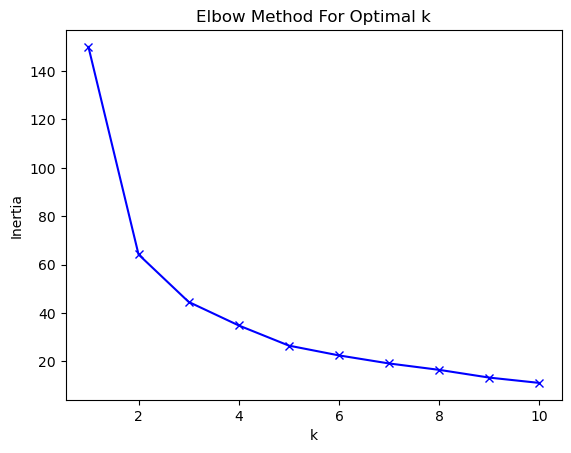

In [18]:
# Plot elbow curve
plt.plot(range(1, 11), inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

In [31]:
kmeans = KMeans(n_clusters=3).fit(scaled_df) 
 

In [32]:
labels = kmeans.labels_
df['Cluster'] = labels
print(df[['Univ', 'Cluster']])

            Univ  Cluster
0          Brown        2
1        CalTech        0
2            CMU        2
3       Columbia        2
4        Cornell        2
5      Dartmouth        0
6           Duke        0
7     Georgetown        2
8        Harvard        0
9   JohnsHopkins        0
10           MIT        0
11  Northwestern        2
12     NotreDame        2
13     PennState        1
14     Princeton        0
15        Purdue        1
16      Stanford        0
17      TexasA&M        1
18    UCBerkeley        2
19      UChicago        2
20     UMichigan        2
21         UPenn        2
22           UVA        2
23    UWisconsin        1
24          Yale        0


In [33]:
# Highest SAT score  
highest_sat = df.loc[df['SAT'].idxmax()]
print(highest_sat)

Univ        CalTech
SAT            1415
Top10           100
Accept           25
SFRatio           6
Expenses      63575
GradRate         81
Cluster           0
Name: 1, dtype: object


In [26]:
# Lowest expenses
lowest_exp = df.loc[df['Expenses'].idxmin()] 
print(lowest_exp)

Univ        TexasA&M
SAT             1075
Top10             49
Accept            67
SFRatio           25
Expenses        8704
GradRate          67
Cluster            1
Name: 17, dtype: object


In [27]:
# Top 10 SAT scores
top10 = df.nlargest(10, 'SAT')
print(top10)

         Univ   SAT  Top10  Accept  SFRatio  Expenses  GradRate  Cluster
1     CalTech  1415    100      25        6     63575        81        2
8     Harvard  1400     91      14       11     39525        97        0
10        MIT  1380     94      30       10     34870        91        0
14  Princeton  1375     91      14        8     30220        95        0
24       Yale  1375     95      19       11     43514        96        0
16   Stanford  1360     90      20       12     36450        93        0
5   Dartmouth  1340     89      23       10     32162        95        0
6        Duke  1315     90      30       12     31585        95        0
0       Brown  1310     89      22       13     22704        94        0
3    Columbia  1310     76      24       12     31510        88        0


In [34]:
lowest = df.loc[df['Accept'].idxmin()]
print(lowest['Univ'])

Harvard
